In [5]:
import import_ipynb
import functions as fn
import numpy as np
import pandas as pd
from lstmcontroller import LstmController
from pidcontroller import PidController
import imageio
from sklearn.preprocessing import MinMaxScaler

In [12]:
window = 15
layers = 2
batch_size = 100
drop = 0.1
units = 100
best_feature_threshold = 0.1

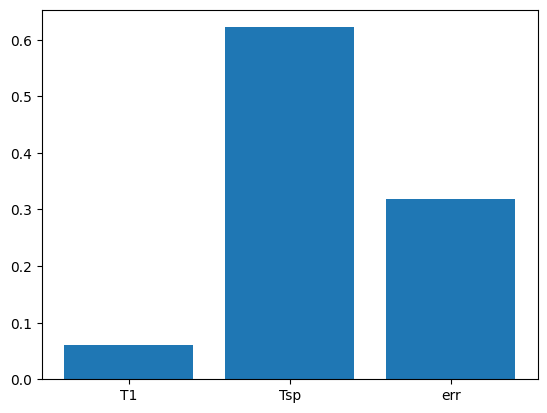

In [13]:
train_data = pd.read_csv('PID_train_data.csv')
train_data['err'] = train_data['Tsp'] - train_data['T1']

y = np.ravel(train_data[['Q1']])
X = train_data[['T1','Tsp','err']]
X = fn.select_best_features(X, y, best_feature_threshold)

In [14]:
s_x = MinMaxScaler()
s_y = MinMaxScaler()
Xtrain, Xtest, ytrain, ytest = fn.create_train_and_test_data(X.values, y.reshape(-1, 1), s_x, s_y, window)
lstm = LstmController(s_x, s_y, Xtrain.shape, layers, window, drop, units)
lstm.train_model(Xtrain, ytrain, batch_size)
lstm.save_model('pid_emulate.h5', 'model_params.pkl')

0epoch [00:00, ?epoch/s]
  0%|                                                                                       | 0/350 [00:00<?, ?epoch/s]
  0%|                                                                                   | 0.00/35.0 [00:00<?, ?batch/s]
  3%|█▊                                                              | 1.00/35.0 [00:15<08:55, 15.7s/batch, loss=0.334]
  6%|███▋                                                            | 2.00/35.0 [00:15<03:38, 6.62s/batch, loss=0.332]
  9%|█████▍                                                          | 3.00/35.0 [00:16<01:58, 3.70s/batch, loss=0.318]
 11%|███████▎                                                        | 4.00/35.0 [00:16<01:12, 2.33s/batch, loss=0.294]
 14%|█████████▏                                                      | 5.00/35.0 [00:16<00:47, 1.57s/batch, loss=0.262]
 17%|██████████▉                                                     | 6.00/35.0 [00:16<00:32, 1.11s/batch, loss=0.227]
 20%|██████████

 66%|██████████████████████████████████████████                      | 23.0/35.0 [00:11<00:05, 2.07batch/s, loss=0.055]
 69%|███████████████████████████████████████████▏                   | 24.0/35.0 [00:11<00:05, 2.07batch/s, loss=0.0552]
 71%|█████████████████████████████████████████████▋                  | 25.0/35.0 [00:11<00:04, 2.07batch/s, loss=0.055]
 74%|██████████████████████████████████████████████▊                | 26.0/35.0 [00:12<00:04, 2.07batch/s, loss=0.0548]
 77%|████████████████████████████████████████████████▌              | 27.0/35.0 [00:12<00:03, 2.06batch/s, loss=0.0547]
 80%|██████████████████████████████████████████████████▍            | 28.0/35.0 [00:13<00:03, 2.06batch/s, loss=0.0549]
 83%|████████████████████████████████████████████████████▏          | 29.0/35.0 [00:13<00:02, 2.06batch/s, loss=0.0551]
 86%|██████████████████████████████████████████████████████         | 30.0/35.0 [00:14<00:02, 2.05batch/s, loss=0.0548]
 89%|███████████████████████████████████

 31%|███████████████████▊                                           | 11.0/35.0 [00:05<00:12, 1.94batch/s, loss=0.0454]
 34%|█████████████████████▌                                         | 12.0/35.0 [00:06<00:11, 1.94batch/s, loss=0.0441]
 37%|███████████████████████▍                                       | 13.0/35.0 [00:06<00:11, 1.94batch/s, loss=0.0442]
 40%|█████████████████████████▏                                     | 14.0/35.0 [00:07<00:10, 1.94batch/s, loss=0.0431]
 43%|███████████████████████████                                    | 15.0/35.0 [00:07<00:10, 1.93batch/s, loss=0.0431]
 46%|████████████████████████████▊                                  | 16.0/35.0 [00:08<00:09, 1.93batch/s, loss=0.0421]
 49%|██████████████████████████████▌                                | 17.0/35.0 [00:08<00:09, 1.93batch/s, loss=0.0419]
 51%|████████████████████████████████▍                              | 18.0/35.0 [00:09<00:08, 1.92batch/s, loss=0.0409]
 54%|██████████████████████████████████▏

  3%|█▍                                             | 11/350 [03:24<1:45:16, 18.63s/epoch, loss=0.0139, val_loss=0.016]
  0%|                                                                      | 0.00/35.0 [00:00<?, ?batch/s, loss=0.0139]
  3%|█▊                                                            | 1.00/35.0 [00:00<00:17, 1.93batch/s, loss=0.00754]
  6%|███▌                                                           | 2.00/35.0 [00:01<00:17, 1.91batch/s, loss=0.0107]
  9%|█████▍                                                         | 3.00/35.0 [00:01<00:16, 1.92batch/s, loss=0.0121]
 11%|███████▏                                                       | 4.00/35.0 [00:02<00:16, 1.91batch/s, loss=0.0116]
 14%|█████████▏                                                      | 5.00/35.0 [00:02<00:15, 1.92batch/s, loss=0.013]
 17%|██████████▊                                                    | 6.00/35.0 [00:03<00:15, 1.91batch/s, loss=0.0172]
 20%|████████████▌                      

 66%|█████████████████████████████████████████▍                     | 23.0/35.0 [00:12<00:06, 1.90batch/s, loss=0.0118]
 69%|███████████████████████████████████████████▉                    | 24.0/35.0 [00:12<00:05, 1.90batch/s, loss=0.012]
 71%|█████████████████████████████████████████████                  | 25.0/35.0 [00:13<00:05, 1.89batch/s, loss=0.0116]
 74%|██████████████████████████████████████████████▊                | 26.0/35.0 [00:13<00:04, 1.89batch/s, loss=0.0114]
 77%|████████████████████████████████████████████████▌              | 27.0/35.0 [00:14<00:04, 1.89batch/s, loss=0.0117]
 80%|██████████████████████████████████████████████████▍            | 28.0/35.0 [00:14<00:03, 1.90batch/s, loss=0.0116]
 83%|████████████████████████████████████████████████████▏          | 29.0/35.0 [00:15<00:03, 1.90batch/s, loss=0.0113]
 86%|██████████████████████████████████████████████████████         | 30.0/35.0 [00:15<00:02, 1.91batch/s, loss=0.0115]
 89%|███████████████████████████████████

 31%|███████████████████▍                                          | 11.0/35.0 [00:05<00:12, 1.87batch/s, loss=0.00856]
 34%|█████████████████████▎                                        | 12.0/35.0 [00:06<00:12, 1.88batch/s, loss=0.00841]
 37%|███████████████████████                                       | 13.0/35.0 [00:06<00:11, 1.87batch/s, loss=0.00863]
 40%|█████████████████████████▏                                     | 14.0/35.0 [00:07<00:11, 1.88batch/s, loss=0.0085]
 43%|██████████████████████████▌                                   | 15.0/35.0 [00:07<00:10, 1.88batch/s, loss=0.00872]
 46%|████████████████████████████▎                                 | 16.0/35.0 [00:08<00:10, 1.89batch/s, loss=0.00864]
 49%|██████████████████████████████                                | 17.0/35.0 [00:09<00:09, 1.88batch/s, loss=0.00847]
 51%|███████████████████████████████▉                              | 18.0/35.0 [00:09<00:09, 1.88batch/s, loss=0.00845]
 54%|█████████████████████████████████▋ 

  6%|██▉                                           | 22/350 [06:53<1:43:40, 18.97s/epoch, loss=0.0082, val_loss=0.0119]
  0%|                                                                      | 0.00/35.0 [00:00<?, ?batch/s, loss=0.0082]
  3%|█▊                                                            | 1.00/35.0 [00:00<00:17, 1.91batch/s, loss=0.00932]
  6%|███▌                                                          | 2.00/35.0 [00:01<00:17, 1.90batch/s, loss=0.00748]
  9%|█████▎                                                        | 3.00/35.0 [00:01<00:16, 1.89batch/s, loss=0.00965]
 11%|███████                                                       | 4.00/35.0 [00:02<00:16, 1.90batch/s, loss=0.00871]
 14%|█████████                                                      | 5.00/35.0 [00:02<00:15, 1.90batch/s, loss=0.0082]
 17%|██████████▋                                                   | 6.00/35.0 [00:03<00:15, 1.90batch/s, loss=0.00818]
 20%|████████████▍                      

 66%|████████████████████████████████████████▋                     | 23.0/35.0 [00:12<00:06, 1.88batch/s, loss=0.00706]
 69%|██████████████████████████████████████████▌                   | 24.0/35.0 [00:12<00:05, 1.88batch/s, loss=0.00701]
 71%|████████████████████████████████████████████▎                 | 25.0/35.0 [00:13<00:05, 1.88batch/s, loss=0.00706]
 74%|██████████████████████████████████████████████                | 26.0/35.0 [00:13<00:04, 1.88batch/s, loss=0.00686]
 77%|███████████████████████████████████████████████▊              | 27.0/35.0 [00:14<00:04, 1.88batch/s, loss=0.00734]
 80%|█████████████████████████████████████████████████▌            | 28.0/35.0 [00:14<00:03, 1.88batch/s, loss=0.00736]
 83%|███████████████████████████████████████████████████▎          | 29.0/35.0 [00:15<00:03, 1.88batch/s, loss=0.00725]
 86%|█████████████████████████████████████████████████████▏        | 30.0/35.0 [00:16<00:02, 1.88batch/s, loss=0.00735]
 89%|███████████████████████████████████

 31%|███████████████████▍                                          | 11.0/35.0 [00:05<00:12, 1.89batch/s, loss=0.00737]
 34%|█████████████████████▎                                        | 12.0/35.0 [00:06<00:12, 1.89batch/s, loss=0.00744]
 37%|███████████████████████                                       | 13.0/35.0 [00:06<00:11, 1.89batch/s, loss=0.00752]
 40%|████████████████████████▊                                     | 14.0/35.0 [00:07<00:11, 1.89batch/s, loss=0.00743]
 43%|██████████████████████████▌                                   | 15.0/35.0 [00:07<00:10, 1.89batch/s, loss=0.00742]
 46%|████████████████████████████▎                                 | 16.0/35.0 [00:08<00:10, 1.89batch/s, loss=0.00751]
 49%|██████████████████████████████                                | 17.0/35.0 [00:09<00:09, 1.89batch/s, loss=0.00724]
 51%|███████████████████████████████▉                              | 18.0/35.0 [00:09<00:09, 1.88batch/s, loss=0.00753]
 54%|█████████████████████████████████▋ 

  9%|████▏                                       | 33/350 [10:21<1:39:38, 18.86s/epoch, loss=0.00468, val_loss=0.00655]
  0%|                                                                     | 0.00/35.0 [00:00<?, ?batch/s, loss=0.00468]
  3%|█▊                                                            | 1.00/35.0 [00:00<00:17, 1.91batch/s, loss=0.00963]
  6%|███▌                                                          | 2.00/35.0 [00:01<00:17, 1.93batch/s, loss=0.00761]
  9%|█████▎                                                        | 3.00/35.0 [00:01<00:16, 1.92batch/s, loss=0.00816]
 11%|███████                                                       | 4.00/35.0 [00:02<00:16, 1.91batch/s, loss=0.00768]
 14%|████████▊                                                     | 5.00/35.0 [00:02<00:15, 1.91batch/s, loss=0.00726]
 17%|██████████▊                                                    | 6.00/35.0 [00:03<00:15, 1.91batch/s, loss=0.0075]
 20%|████████████▍                      

 66%|████████████████████████████████████████▋                     | 23.0/35.0 [00:12<00:06, 1.90batch/s, loss=0.00458]
 69%|██████████████████████████████████████████▌                   | 24.0/35.0 [00:12<00:05, 1.90batch/s, loss=0.00461]
 71%|████████████████████████████████████████████▎                 | 25.0/35.0 [00:13<00:05, 1.90batch/s, loss=0.00451]
 74%|██████████████████████████████████████████████                | 26.0/35.0 [00:13<00:04, 1.90batch/s, loss=0.00448]
 77%|███████████████████████████████████████████████▊              | 27.0/35.0 [00:14<00:04, 1.90batch/s, loss=0.00471]
 80%|█████████████████████████████████████████████████▌            | 28.0/35.0 [00:14<00:03, 1.90batch/s, loss=0.00465]
 83%|███████████████████████████████████████████████████▎          | 29.0/35.0 [00:15<00:03, 1.91batch/s, loss=0.00463]
 86%|█████████████████████████████████████████████████████▏        | 30.0/35.0 [00:15<00:02, 1.91batch/s, loss=0.00452]
 89%|███████████████████████████████████

 31%|███████████████████▍                                          | 11.0/35.0 [00:05<00:12, 1.87batch/s, loss=0.00408]
 34%|█████████████████████▎                                        | 12.0/35.0 [00:06<00:12, 1.88batch/s, loss=0.00391]
 37%|███████████████████████                                       | 13.0/35.0 [00:06<00:11, 1.89batch/s, loss=0.00378]
 40%|████████████████████████▊                                     | 14.0/35.0 [00:07<00:11, 1.90batch/s, loss=0.00366]
 43%|██████████████████████████▌                                   | 15.0/35.0 [00:07<00:10, 1.90batch/s, loss=0.00357]
 46%|████████████████████████████▎                                 | 16.0/35.0 [00:08<00:09, 1.90batch/s, loss=0.00372]
 49%|██████████████████████████████                                | 17.0/35.0 [00:08<00:09, 1.90batch/s, loss=0.00357]
 51%|████████████████████████████████▍                              | 18.0/35.0 [00:09<00:08, 1.91batch/s, loss=0.0035]
 54%|██████████████████████████████████▏

 13%|█████▋                                       | 44/350 [13:48<1:36:55, 19.00s/epoch, loss=0.0037, val_loss=0.00518]
  0%|                                                                      | 0.00/35.0 [00:00<?, ?batch/s, loss=0.0037]
  3%|█▊                                                            | 1.00/35.0 [00:00<00:18, 1.89batch/s, loss=0.00735]
  6%|███▌                                                          | 2.00/35.0 [00:01<00:17, 1.88batch/s, loss=0.00423]
  9%|█████▎                                                        | 3.00/35.0 [00:01<00:17, 1.87batch/s, loss=0.00333]
 11%|███████                                                       | 4.00/35.0 [00:02<00:16, 1.86batch/s, loss=0.00304]
 14%|█████████                                                      | 5.00/35.0 [00:02<00:16, 1.86batch/s, loss=0.0027]
 17%|██████████▋                                                   | 6.00/35.0 [00:03<00:15, 1.87batch/s, loss=0.00258]
 20%|████████████▍                      

 66%|████████████████████████████████████████▋                     | 23.0/35.0 [00:11<00:06, 1.92batch/s, loss=0.00515]
 69%|██████████████████████████████████████████▌                   | 24.0/35.0 [00:12<00:05, 1.92batch/s, loss=0.00509]
 71%|████████████████████████████████████████████▎                 | 25.0/35.0 [00:12<00:05, 1.92batch/s, loss=0.00503]
 74%|██████████████████████████████████████████████                | 26.0/35.0 [00:13<00:04, 1.92batch/s, loss=0.00504]
 77%|███████████████████████████████████████████████▊              | 27.0/35.0 [00:13<00:04, 1.92batch/s, loss=0.00495]
 80%|██████████████████████████████████████████████████▍            | 28.0/35.0 [00:14<00:03, 1.93batch/s, loss=0.0049]
 83%|████████████████████████████████████████████████████▏          | 29.0/35.0 [00:14<00:03, 1.93batch/s, loss=0.0049]
 86%|█████████████████████████████████████████████████████▏        | 30.0/35.0 [00:15<00:02, 1.93batch/s, loss=0.00477]
 89%|███████████████████████████████████

 31%|███████████████████▍                                          | 11.0/35.0 [00:05<00:11, 2.02batch/s, loss=0.00315]
 34%|█████████████████████▎                                        | 12.0/35.0 [00:05<00:11, 2.03batch/s, loss=0.00325]
 37%|███████████████████████                                       | 13.0/35.0 [00:06<00:10, 2.03batch/s, loss=0.00309]
 40%|████████████████████████▊                                     | 14.0/35.0 [00:06<00:10, 2.02batch/s, loss=0.00313]
 43%|██████████████████████████▌                                   | 15.0/35.0 [00:07<00:09, 2.02batch/s, loss=0.00358]
 46%|████████████████████████████▎                                 | 16.0/35.0 [00:07<00:09, 2.02batch/s, loss=0.00352]
 49%|██████████████████████████████                                | 17.0/35.0 [00:08<00:08, 2.02batch/s, loss=0.00342]
 51%|███████████████████████████████▉                              | 18.0/35.0 [00:08<00:08, 2.02batch/s, loss=0.00353]
 54%|█████████████████████████████████▋ 

 16%|██████▉                                     | 55/350 [17:07<1:27:54, 17.88s/epoch, loss=0.00298, val_loss=0.00454]
  0%|                                                                     | 0.00/35.0 [00:00<?, ?batch/s, loss=0.00298]
  3%|█▊                                                            | 1.00/35.0 [00:00<00:16, 2.01batch/s, loss=0.00189]
  6%|███▌                                                          | 2.00/35.0 [00:01<00:16, 2.00batch/s, loss=0.00229]
  9%|█████▎                                                        | 3.00/35.0 [00:01<00:16, 1.98batch/s, loss=0.00402]
 11%|███████                                                       | 4.00/35.0 [00:02<00:15, 1.99batch/s, loss=0.00505]
 14%|█████████                                                      | 5.00/35.0 [00:02<00:14, 2.01batch/s, loss=0.0046]
 17%|██████████▋                                                   | 6.00/35.0 [00:02<00:14, 2.01batch/s, loss=0.00433]
 20%|████████████▍                      

 66%|████████████████████████████████████████▋                     | 23.0/35.0 [00:11<00:06, 1.99batch/s, loss=0.00254]
 69%|██████████████████████████████████████████▌                   | 24.0/35.0 [00:11<00:05, 2.00batch/s, loss=0.00247]
 71%|█████████████████████████████████████████████                  | 25.0/35.0 [00:12<00:04, 2.00batch/s, loss=0.0025]
 74%|██████████████████████████████████████████████                | 26.0/35.0 [00:12<00:04, 2.00batch/s, loss=0.00245]
 77%|████████████████████████████████████████████████▌              | 27.0/35.0 [00:13<00:03, 2.00batch/s, loss=0.0026]
 80%|█████████████████████████████████████████████████▌            | 28.0/35.0 [00:13<00:03, 2.00batch/s, loss=0.00254]
 83%|████████████████████████████████████████████████████▏          | 29.0/35.0 [00:14<00:03, 1.99batch/s, loss=0.0028]
 86%|█████████████████████████████████████████████████████▏        | 30.0/35.0 [00:15<00:02, 1.99batch/s, loss=0.00273]
 89%|███████████████████████████████████

 31%|███████████████████▍                                          | 11.0/35.0 [00:05<00:11, 2.00batch/s, loss=0.00335]
 34%|█████████████████████▎                                        | 12.0/35.0 [00:05<00:11, 2.00batch/s, loss=0.00333]
 37%|███████████████████████▍                                       | 13.0/35.0 [00:06<00:11, 2.00batch/s, loss=0.0032]
 40%|████████████████████████▊                                     | 14.0/35.0 [00:07<00:10, 2.00batch/s, loss=0.00307]
 43%|██████████████████████████▌                                   | 15.0/35.0 [00:07<00:10, 1.99batch/s, loss=0.00292]
 46%|████████████████████████████▎                                 | 16.0/35.0 [00:08<00:09, 2.00batch/s, loss=0.00289]
 49%|██████████████████████████████                                | 17.0/35.0 [00:08<00:09, 2.00batch/s, loss=0.00279]
 51%|███████████████████████████████▉                              | 18.0/35.0 [00:09<00:08, 2.00batch/s, loss=0.00268]
 54%|██████████████████████████████████▏

 19%|████████▎                                   | 66/350 [20:24<1:24:23, 17.83s/epoch, loss=0.00255, val_loss=0.00483]
  0%|                                                                     | 0.00/35.0 [00:00<?, ?batch/s, loss=0.00255]
  3%|█▋                                                           | 1.00/35.0 [00:00<00:16, 2.00batch/s, loss=0.000921]
  6%|███▌                                                          | 2.00/35.0 [00:00<00:16, 2.00batch/s, loss=0.00159]
  9%|█████▎                                                        | 3.00/35.0 [00:01<00:15, 2.01batch/s, loss=0.00352]
 11%|███████                                                       | 4.00/35.0 [00:01<00:15, 2.00batch/s, loss=0.00501]
 14%|████████▊                                                     | 5.00/35.0 [00:02<00:14, 2.01batch/s, loss=0.00423]
 17%|██████████▋                                                   | 6.00/35.0 [00:02<00:14, 2.01batch/s, loss=0.00381]
 20%|████████████▍                      

 66%|████████████████████████████████████████▋                     | 23.0/35.0 [00:11<00:05, 2.02batch/s, loss=0.00208]
 69%|███████████████████████████████████████████▏                   | 24.0/35.0 [00:11<00:05, 2.02batch/s, loss=0.0021]
 71%|████████████████████████████████████████████▎                 | 25.0/35.0 [00:12<00:04, 2.02batch/s, loss=0.00207]
 74%|██████████████████████████████████████████████                | 26.0/35.0 [00:12<00:04, 2.02batch/s, loss=0.00228]
 77%|███████████████████████████████████████████████▊              | 27.0/35.0 [00:13<00:03, 2.02batch/s, loss=0.00223]
 80%|█████████████████████████████████████████████████▌            | 28.0/35.0 [00:13<00:03, 2.02batch/s, loss=0.00219]
 83%|███████████████████████████████████████████████████▎          | 29.0/35.0 [00:14<00:02, 2.02batch/s, loss=0.00217]
 86%|█████████████████████████████████████████████████████▏        | 30.0/35.0 [00:14<00:02, 2.01batch/s, loss=0.00217]
 89%|███████████████████████████████████

In [1]:
yp = lstm.predict(Xtest)

Xtest_us = lstm.s_x.inverse_transform(Xtest[:,-1,:])
ytest_us = lstm.s_y.inverse_transform(ytest)

sp = Xtest_us[:,0]
pv = Xtest_us[:,0] + Xtest_us[:,1]

fn.multiplot({
    '$SP$ $(^oC)$': sp,
    '$T_1$ $(^oC)$': pv,
    '$Q_{PID}$ (%)': ytest_us,
    '$Q_{LSTM}$ (%)': yp
}, 'Time', 'Value')

NameError: name 'lstm' is not defined

In [6]:
Kc   = 6.0
tauI = 75.0 # sec
tauD = 0.0  # sec
out_min = 0
out_max = 100
pid = PidController(Kc, Kc / tauI, -Kc * tauD, out_min, out_max)

In [7]:
lstm = LstmController.load_model('pid_emulate.h5', 'model_params.pkl')

run_time = 90 * 60

Tsp = fn.generate_temperature_setpoints(lstm.window + 15, 23.67, 240, 600, 30, 70, run_time)

lstm.temp_history = 14 * [Tsp[0]]
lstm.err_history = 14 * [0]

In [10]:
tm, T1, Qpid, Qlstm = fn.run_tclab(run_time, Tsp, pid, passive_cont=lstm, emulator=True, speedup=60)
gif_time_step = 10
fn.make_image_history('./figures/pid_{}.png', len(tm), gif_time_step, {
    'SP $(^oC)$': Tsp,
    '$T_1$ $(^oC)$': T1,
    '$Q_{PID}$ (%)': Qpid,
    '$Q_{LSTM}$ (%)': Qlstm
})
images = fn.read_image_history('./figures/pid_{}.png', len(tm), 10)
imageio.mimsave('pid_controller.gif', images)

TCLab version 0.4.9
Simulated TCLab
1/1 [==============================] - 0s 30ms/step
   0.0   0.00  20.95   0.00   2.03
1/1 [==============================] - 0s 28ms/step
   5.0   0.00  20.63   0.00   0.00
1/1 [==============================] - 0s 28ms/step
   6.0   0.00  20.95   0.00   0.00
1/1 [==============================] - 0s 28ms/step
   7.1   0.00  20.95   0.00   0.38
1/1 [==============================] - 0s 28ms/step
   8.1   0.00  20.95   0.00   0.77
1/1 [==============================] - 0s 27ms/step
   9.1   0.00  20.95   0.00   1.03
1/1 [==============================] - 0s 28ms/step
  10.1   0.00  20.95   0.00   1.20
1/1 [==============================] - 0s 27ms/step
  11.1   0.00  20.95   0.00   1.21
1/1 [==============================] - 0s 28ms/step
  12.1   0.00  20.63   0.00   1.08
1/1 [==============================] - 0s 27ms/step
  13.2   0.00  20.95   0.00   0.93
1/1 [==============================] - 0s 27ms/step
  14.0   0.00  20.95   0.00   0.84
1/1 [==

1/1 [==============================] - 0s 27ms/step
 192.1  48.00  51.57  37.84  26.47
1/1 [==============================] - 0s 27ms/step
 193.1  48.00  51.57  37.56  26.62
1/1 [==============================] - 0s 27ms/step
 194.1  48.00  51.57  37.27  26.87
1/1 [==============================] - 0s 28ms/step
 195.1  48.00  51.57  36.98  27.12
1/1 [==============================] - 0s 27ms/step
 196.1  48.00  51.57  36.69  27.34
1/1 [==============================] - 0s 29ms/step
 197.1  48.00  51.57  36.40  27.46
1/1 [==============================] - 0s 27ms/step
 198.2  48.00  51.57  36.10  27.58
1/1 [==============================] - 0s 27ms/step
 199.0  48.00  51.25  37.81  27.77
1/1 [==============================] - 0s 28ms/step
 200.1  48.00  51.57  35.59  27.96
1/1 [==============================] - 0s 28ms/step
 201.1  48.00  51.25  37.25  28.17
1/1 [==============================] - 0s 27ms/step
 202.1  48.00  51.25  36.99  28.42
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 27ms/step
 380.1  58.00  58.66  63.32  62.25
1/1 [==============================] - 0s 27ms/step
 381.2  58.00  58.66  63.26  62.23
1/1 [==============================] - 0s 28ms/step
 382.0  58.00  58.66  63.22  62.19
1/1 [==============================] - 0s 27ms/step
 383.0  58.00  58.98  61.21  62.12
1/1 [==============================] - 0s 28ms/step
 384.1  58.00  58.98  61.13  61.99
1/1 [==============================] - 0s 28ms/step
 385.1  58.00  58.98  61.05  61.79
1/1 [==============================] - 0s 28ms/step
 386.1  58.00  58.98  60.97  61.57
1/1 [==============================] - 0s 28ms/step
 387.1  58.00  58.66  62.85  61.52
1/1 [==============================] - 0s 28ms/step
 388.1  58.00  58.98  60.83  61.52
1/1 [==============================] - 0s 28ms/step
 389.1  58.00  58.98  60.75  61.54
1/1 [==============================] - 0s 28ms/step
 390.0  58.00  58.98  60.69  61.55
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 28ms/step
 569.0  58.00  58.01  61.87  63.44
1/1 [==============================] - 0s 27ms/step
 570.0  58.00  58.01  61.87  63.44
1/1 [==============================] - 0s 28ms/step
 571.0  58.00  58.01  61.87  63.44
1/1 [==============================] - 0s 28ms/step
 572.1  58.00  58.01  61.87  63.44
1/1 [==============================] - 0s 27ms/step
 573.1  58.00  58.01  61.87  63.44
1/1 [==============================] - 0s 28ms/step
 574.1  58.00  58.01  61.87  63.44
1/1 [==============================] - 0s 27ms/step
 575.0  58.00  58.01  61.87  63.44
1/1 [==============================] - 0s 28ms/step
 576.0  58.00  58.01  61.87  63.44
1/1 [==============================] - 0s 27ms/step
 577.1  58.00  58.01  61.86  63.44
1/1 [==============================] - 0s 27ms/step
 578.1  58.00  58.01  61.86  63.44
1/1 [==============================] - 0s 27ms/step
 579.0  58.00  58.01  61.86  63.44
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 28ms/step
 757.0  47.00  46.09  47.47  45.97
1/1 [==============================] - 0s 27ms/step
 758.0  47.00  46.41  45.58  45.94
1/1 [==============================] - 0s 27ms/step
 759.1  47.00  46.09  47.60  45.95
1/1 [==============================] - 0s 28ms/step
 760.1  47.00  46.41  45.71  45.90
1/1 [==============================] - 0s 28ms/step
 761.1  47.00  46.41  45.76  45.76
1/1 [==============================] - 0s 28ms/step
 762.0  47.00  46.41  45.80  45.64
1/1 [==============================] - 0s 27ms/step
 763.0  47.00  46.41  45.85  45.56
1/1 [==============================] - 0s 28ms/step
 764.1  47.00  46.41  45.90  45.51
1/1 [==============================] - 0s 27ms/step
 765.1  47.00  46.41  45.95  45.47
1/1 [==============================] - 0s 27ms/step
 766.1  47.00  46.41  45.99  45.41
1/1 [==============================] - 0s 28ms/step
 767.1  47.00  46.41  46.04  45.33
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 31ms/step
 948.1  47.00  47.06  43.14  43.14
1/1 [==============================] - 0s 32ms/step
 949.1  47.00  47.06  43.14  43.07
1/1 [==============================] - 0s 29ms/step
 950.0  47.00  47.06  43.13  43.04
1/1 [==============================] - 0s 30ms/step
 951.1  47.00  47.06  43.13  43.04
1/1 [==============================] - 0s 30ms/step
 952.0  47.00  47.06  43.13  42.97
1/1 [==============================] - 0s 31ms/step
 953.1  47.00  47.06  43.12  42.99
1/1 [==============================] - 0s 32ms/step
 954.1  47.00  47.06  43.12  43.00
1/1 [==============================] - 0s 30ms/step
 955.0  47.00  47.06  43.11  43.00
1/1 [==============================] - 0s 30ms/step
 956.1  47.00  47.06  43.11  43.00
1/1 [==============================] - 0s 31ms/step
 957.1  47.00  46.73  45.06  43.14
1/1 [==============================] - 0s 30ms/step
 958.0  47.00  47.06  43.13  43.21
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 28ms/step
1136.1  47.00  47.06  43.31  43.32
1/1 [==============================] - 0s 27ms/step
1137.0  47.00  47.06  43.31  43.31
1/1 [==============================] - 0s 28ms/step
1138.1  47.00  46.73  45.26  43.29
1/1 [==============================] - 0s 28ms/step
1139.1  47.00  47.06  43.33  43.33
1/1 [==============================] - 0s 27ms/step
1140.0  47.00  47.06  43.32  43.19
1/1 [==============================] - 0s 28ms/step
1141.1  47.00  47.06  43.32  43.14
1/1 [==============================] - 0s 28ms/step
1142.0  47.00  46.73  45.27  43.26
1/1 [==============================] - 0s 28ms/step
1143.1  47.00  46.73  45.29  43.48
1/1 [==============================] - 0s 29ms/step
1144.1  47.00  47.06  43.36  43.42
1/1 [==============================] - 0s 28ms/step
1145.0  47.00  47.06  43.35  43.31
1/1 [==============================] - 0s 27ms/step
1146.1  47.00  47.06  43.35  43.11
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 27ms/step
1324.1  51.00  51.57  49.12  48.33
1/1 [==============================] - 0s 27ms/step
1325.1  51.00  51.57  49.08  48.21
1/1 [==============================] - 0s 27ms/step
1326.0  51.00  51.57  49.03  48.03
1/1 [==============================] - 0s 28ms/step
1327.1  51.00  51.57  48.99  47.84
1/1 [==============================] - 0s 27ms/step
1328.1  51.00  51.57  48.94  47.97
1/1 [==============================] - 0s 28ms/step
1329.0  51.00  51.57  48.90  48.13
1/1 [==============================] - 0s 26ms/step
1330.0  51.00  51.57  48.85  48.33
1/1 [==============================] - 0s 28ms/step
1331.1  51.00  51.57  48.80  48.23
1/1 [==============================] - 0s 27ms/step
1332.0  51.00  51.57  48.76  48.14
1/1 [==============================] - 0s 28ms/step
1333.1  51.00  51.57  48.71  48.36
1/1 [==============================] - 0s 27ms/step
1334.1  51.00  51.57  48.67  48.32
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 28ms/step
1512.1  51.00  51.25  48.91  50.37
1/1 [==============================] - 0s 27ms/step
1513.1  51.00  50.92  50.85  50.62
1/1 [==============================] - 0s 27ms/step
1514.0  51.00  50.92  50.85  50.98
1/1 [==============================] - 0s 27ms/step
1515.0  51.00  51.25  48.90  51.25
1/1 [==============================] - 0s 28ms/step
1516.1  51.00  50.92  50.84  51.16
1/1 [==============================] - 0s 27ms/step
1517.1  51.00  50.92  50.85  51.08
1/1 [==============================] - 0s 28ms/step
1518.0  51.00  50.92  50.85  51.00
1/1 [==============================] - 0s 28ms/step
1519.1  51.00  50.92  50.86  51.18
1/1 [==============================] - 0s 28ms/step
1520.1  51.00  51.25  48.90  50.92
1/1 [==============================] - 0s 27ms/step
1521.0  51.00  50.92  50.84  50.65
1/1 [==============================] - 0s 28ms/step
1522.1  51.00  50.92  50.85  50.76
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 28ms/step
1700.1  51.00  50.92  50.85  50.90
1/1 [==============================] - 0s 28ms/step
1701.0  51.00  50.92  50.86  51.20
1/1 [==============================] - 0s 29ms/step
1702.1  51.00  50.92  50.87  51.50
1/1 [==============================] - 0s 27ms/step
1703.1  51.00  50.92  50.87  51.48
1/1 [==============================] - 0s 27ms/step
1704.0  51.00  50.92  50.88  51.42
1/1 [==============================] - 0s 28ms/step
1705.1  51.00  50.92  50.88  51.33
1/1 [==============================] - 0s 27ms/step
1706.1  51.00  51.25  48.93  51.13
1/1 [==============================] - 0s 28ms/step
1707.0  51.00  50.92  50.87  50.94
1/1 [==============================] - 0s 27ms/step
1708.1  51.00  50.92  50.88  50.84
1/1 [==============================] - 0s 28ms/step
1709.1  51.00  50.92  50.88  51.09
1/1 [==============================] - 0s 28ms/step
1710.0  51.00  50.92  50.89  51.06
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 28ms/step
1892.1  58.00  58.98  59.29  60.48
1/1 [==============================] - 0s 28ms/step
1893.1  58.00  58.98  59.21  60.55
1/1 [==============================] - 0s 27ms/step
1894.1  58.00  58.98  59.14  60.62
1/1 [==============================] - 0s 28ms/step
1895.0  58.00  58.98  59.06  60.68
1/1 [==============================] - 0s 28ms/step
1896.1  58.00  58.98  58.97  60.75
1/1 [==============================] - 0s 28ms/step
1897.1  58.00  58.98  58.90  60.84
1/1 [==============================] - 0s 28ms/step
1898.1  58.00  58.98  58.82  60.94
1/1 [==============================] - 0s 28ms/step
1899.1  58.00  58.98  58.74  60.90
1/1 [==============================] - 0s 27ms/step
1900.0  58.00  58.98  58.67  60.86
1/1 [==============================] - 0s 28ms/step
1901.0  58.00  58.98  58.59  60.81
1/1 [==============================] - 0s 28ms/step
1902.1  58.00  58.98  58.50  60.91
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 28ms/step
2080.1  33.00  55.11   0.00   0.05
1/1 [==============================] - 0s 28ms/step
2081.1  33.00  55.11   0.00   0.05
1/1 [==============================] - 0s 28ms/step
2082.1  33.00  54.79   0.00   0.05
1/1 [==============================] - 0s 27ms/step
2083.0  33.00  54.79   0.00   0.06
1/1 [==============================] - 0s 28ms/step
2084.1  33.00  54.47   0.00   0.06
1/1 [==============================] - 0s 28ms/step
2085.1  33.00  54.15   0.00   0.06
1/1 [==============================] - 0s 28ms/step
2086.1  33.00  54.15   0.00   0.07
1/1 [==============================] - 0s 28ms/step
2087.1  33.00  53.82   0.00   0.07
1/1 [==============================] - 0s 27ms/step
2088.1  33.00  53.82   0.00   0.07
1/1 [==============================] - 0s 27ms/step
2089.0  33.00  53.50   0.00   0.08
1/1 [==============================] - 0s 28ms/step
2090.0  33.00  53.18   0.00   0.08
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 27ms/step
2268.0  33.00  33.84  18.37  20.53
1/1 [==============================] - 0s 29ms/step
2269.0  33.00  33.84  18.30  20.58
1/1 [==============================] - 0s 28ms/step
2270.1  33.00  33.52  20.19  20.68
1/1 [==============================] - 0s 29ms/step
2271.1  33.00  33.84  18.19  20.78
1/1 [==============================] - 0s 29ms/step
2272.1  33.00  33.84  18.13  20.79
1/1 [==============================] - 0s 30ms/step
2273.1  33.00  33.52  20.02  20.82
1/1 [==============================] - 0s 28ms/step
2274.1  33.00  33.52  19.98  20.90
1/1 [==============================] - 0s 28ms/step
2275.1  33.00  33.84  17.98  20.94
1/1 [==============================] - 0s 29ms/step
2276.0  33.00  33.52  19.87  20.99
1/1 [==============================] - 0s 28ms/step
2277.1  33.00  33.52  19.83  21.05
1/1 [==============================] - 0s 28ms/step
2278.1  33.00  33.52  19.79  21.13
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 28ms/step
2456.1  33.00  32.87  21.24  23.60
1/1 [==============================] - 0s 30ms/step
2457.0  47.00  32.87 100.00  97.56
1/1 [==============================] - 0s 29ms/step
2458.0  47.00  33.20 100.00  99.30
1/1 [==============================] - 0s 28ms/step
2459.1  47.00  32.87 100.00 100.00
1/1 [==============================] - 0s 29ms/step
2460.1  47.00  33.20 100.00 100.00
1/1 [==============================] - 0s 28ms/step
2461.1  47.00  33.20 100.00 100.00
1/1 [==============================] - 0s 27ms/step
2462.1  47.00  33.20 100.00 100.00
1/1 [==============================] - 0s 28ms/step
2463.1  47.00  33.20 100.00  99.08
1/1 [==============================] - 0s 27ms/step
2464.0  47.00  33.20 100.00  98.23
1/1 [==============================] - 0s 28ms/step
2465.0  47.00  33.52 100.00  97.65
1/1 [==============================] - 0s 28ms/step
2466.1  47.00  33.52 100.00  97.22
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 28ms/step
2644.0  47.00  47.38  42.08  41.39
1/1 [==============================] - 0s 28ms/step
2645.0  47.00  47.70  40.09  41.30
1/1 [==============================] - 0s 29ms/step
2646.0  47.00  47.38  41.99  41.26
1/1 [==============================] - 0s 30ms/step
2647.1  47.00  47.38  41.96  41.34
1/1 [==============================] - 0s 30ms/step
2648.1  47.00  47.38  41.93  41.47
1/1 [==============================] - 0s 28ms/step
2649.1  47.00  47.38  41.90  41.57
1/1 [==============================] - 0s 29ms/step
2650.1  47.00  47.38  41.87  41.63
1/1 [==============================] - 0s 28ms/step
2651.1  47.00  47.38  41.84  41.68
1/1 [==============================] - 0s 28ms/step
2652.0  47.00  47.38  41.81  41.73
1/1 [==============================] - 0s 28ms/step
2653.1  47.00  47.38  41.78  41.80
1/1 [==============================] - 0s 28ms/step
2654.1  47.00  47.38  41.75  41.88
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 28ms/step
2832.1  47.00  47.06  43.25  43.04
1/1 [==============================] - 0s 28ms/step
2833.1  47.00  47.06  43.25  42.95
1/1 [==============================] - 0s 28ms/step
2834.1  47.00  47.06  43.24  42.95
1/1 [==============================] - 0s 28ms/step
2835.1  47.00  47.06  43.24  42.95
1/1 [==============================] - 0s 28ms/step
2836.1  47.00  46.73  45.19  43.08
1/1 [==============================] - 0s 28ms/step
2837.0  47.00  47.06  43.26  43.14
1/1 [==============================] - 0s 29ms/step
2838.0  47.00  47.06  43.25  43.09
1/1 [==============================] - 0s 28ms/step
2839.1  47.00  47.06  43.25  43.00
1/1 [==============================] - 0s 28ms/step
2840.1  47.00  47.06  43.24  42.96
1/1 [==============================] - 0s 28ms/step
2841.1  47.00  47.06  43.24  42.96
1/1 [==============================] - 0s 28ms/step
2842.1  47.00  47.06  43.23  42.97
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 31ms/step
3023.1  51.00  51.57  48.47  48.60
1/1 [==============================] - 0s 27ms/step
3024.1  51.00  51.57  48.42  48.60
1/1 [==============================] - 0s 28ms/step
3025.1  51.00  51.57  48.38  48.60
1/1 [==============================] - 0s 28ms/step
3026.0  51.00  51.57  48.34  48.60
1/1 [==============================] - 0s 28ms/step
3027.1  51.00  51.57  48.29  48.60
1/1 [==============================] - 0s 28ms/step
3028.1  51.00  51.57  48.24  48.60
1/1 [==============================] - 0s 27ms/step
3029.0  51.00  51.57  48.20  48.60
1/1 [==============================] - 0s 29ms/step
3030.1  51.00  51.57  48.15  48.60
1/1 [==============================] - 0s 27ms/step
3031.1  51.00  51.57  48.11  48.60
1/1 [==============================] - 0s 27ms/step
3032.1  51.00  51.57  48.06  48.60
1/1 [==============================] - 0s 27ms/step
3033.0  51.00  51.57  48.02  48.60
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 27ms/step
3211.1  51.00  50.92  50.78  50.86
1/1 [==============================] - 0s 28ms/step
3212.0  51.00  50.92  50.79  50.82
1/1 [==============================] - 0s 27ms/step
3213.1  51.00  50.92  50.80  51.03
1/1 [==============================] - 0s 27ms/step
3214.1  51.00  50.92  50.80  51.24
1/1 [==============================] - 0s 27ms/step
3215.0  51.00  51.25  48.85  51.37
1/1 [==============================] - 0s 28ms/step
3216.0  51.00  50.92  50.79  51.22
1/1 [==============================] - 0s 27ms/step
3217.1  51.00  50.92  50.80  51.14
1/1 [==============================] - 0s 27ms/step
3218.0  51.00  50.92  50.80  51.09
1/1 [==============================] - 0s 27ms/step
3219.0  51.00  50.92  50.81  51.02
1/1 [==============================] - 0s 27ms/step
3220.1  51.00  50.92  50.81  50.91
1/1 [==============================] - 0s 31ms/step
3221.1  51.00  50.92  50.82  51.08
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 28ms/step
3399.1  51.00  50.92  50.84  51.22
1/1 [==============================] - 0s 27ms/step
3400.0  51.00  51.25  48.89  51.11
1/1 [==============================] - 0s 29ms/step
3401.1  51.00  50.92  50.83  51.06
1/1 [==============================] - 0s 28ms/step
3402.1  51.00  50.92  50.83  51.10
1/1 [==============================] - 0s 27ms/step
3403.0  51.00  50.92  50.84  51.47
1/1 [==============================] - 0s 27ms/step
3404.0  51.00  50.92  50.84  51.52
1/1 [==============================] - 0s 28ms/step
3405.1  51.00  50.92  50.85  51.53
1/1 [==============================] - 0s 28ms/step
3406.1  51.00  50.92  50.86  51.50
1/1 [==============================] - 0s 28ms/step
3407.0  51.00  50.92  50.86  51.46
1/1 [==============================] - 0s 28ms/step
3408.1  51.00  50.92  50.87  51.40
1/1 [==============================] - 0s 29ms/step
3409.1  51.00  50.92  50.88  51.33
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 28ms/step
3587.1  34.00  38.68   7.66   9.30
1/1 [==============================] - 0s 29ms/step
3588.1  34.00  38.35   9.26   9.59
1/1 [==============================] - 0s 27ms/step
3589.1  34.00  38.35   8.92   9.90
1/1 [==============================] - 0s 28ms/step
3590.0  34.00  38.35   8.58  10.19
1/1 [==============================] - 0s 27ms/step
3591.0  34.00  38.03  10.20  10.49
1/1 [==============================] - 0s 28ms/step
3592.1  34.00  38.03   9.84  10.77
1/1 [==============================] - 0s 27ms/step
3593.1  34.00  38.03   9.53  11.07
1/1 [==============================] - 0s 28ms/step
3594.0  34.00  37.71  11.18  11.38
1/1 [==============================] - 0s 27ms/step
3595.1  34.00  37.71  10.86  11.66
1/1 [==============================] - 0s 27ms/step
3596.1  34.00  37.71  10.57  11.96
1/1 [==============================] - 0s 28ms/step
3597.1  34.00  37.71  10.29  12.26
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 27ms/step
3775.1  34.00  34.16  21.30  24.42
1/1 [==============================] - 0s 28ms/step
3776.0  34.00  34.16  21.29  24.43
1/1 [==============================] - 0s 27ms/step
3777.1  34.00  34.16  21.27  24.43
1/1 [==============================] - 0s 27ms/step
3778.1  34.00  34.16  21.26  24.44
1/1 [==============================] - 0s 28ms/step
3779.1  34.00  34.16  21.25  24.44
1/1 [==============================] - 0s 29ms/step
3780.0  34.00  34.16  21.24  24.43
1/1 [==============================] - 0s 27ms/step
3781.1  34.00  34.16  21.22  24.35
1/1 [==============================] - 0s 27ms/step
3782.1  34.00  34.16  21.21  24.35
1/1 [==============================] - 0s 28ms/step
3783.0  34.00  34.16  21.20  24.35
1/1 [==============================] - 0s 27ms/step
3784.1  34.00  33.84  23.14  24.32
1/1 [==============================] - 0s 28ms/step
3785.1  34.00  33.84  23.16  24.43
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 28ms/step
3963.1  34.00  34.16  20.93  24.75
1/1 [==============================] - 0s 28ms/step
3964.1  34.00  34.16  20.92  24.67
1/1 [==============================] - 0s 27ms/step
3965.0  34.00  33.84  22.87  24.65
1/1 [==============================] - 0s 28ms/step
3966.1  34.00  33.84  22.88  24.68
1/1 [==============================] - 0s 28ms/step
3967.1  34.00  33.84  22.89  24.81
1/1 [==============================] - 0s 27ms/step
3968.0  34.00  33.84  22.91  24.91
1/1 [==============================] - 0s 28ms/step
3969.1  34.00  33.84  22.92  24.99
1/1 [==============================] - 0s 28ms/step
3970.1  34.00  33.84  22.93  25.05
1/1 [==============================] - 0s 27ms/step
3971.0  34.00  34.16  20.99  24.98
1/1 [==============================] - 0s 28ms/step
3972.1  34.00  33.84  22.93  24.92
1/1 [==============================] - 0s 27ms/step
3973.1  34.00  34.16  20.99  24.94
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 28ms/step
4154.0  34.00  34.16  21.04  24.99
1/1 [==============================] - 0s 28ms/step
4155.1  34.00  33.84  22.99  24.94
1/1 [==============================] - 0s 28ms/step
4156.1  34.00  33.84  23.00  24.93
1/1 [==============================] - 0s 28ms/step
4157.0  34.00  34.16  21.05  24.97
1/1 [==============================] - 0s 28ms/step
4158.1  34.00  33.84  23.00  24.93
1/1 [==============================] - 0s 28ms/step
4159.1  34.00  33.84  23.01  25.02
1/1 [==============================] - 0s 29ms/step
4160.0  34.00  34.16  21.07  25.07
1/1 [==============================] - 0s 28ms/step
4161.1  34.00  34.16  21.05  25.06
1/1 [==============================] - 0s 28ms/step
4162.0  34.00  34.16  21.04  25.03
1/1 [==============================] - 0s 28ms/step
4163.1  34.00  34.16  21.03  24.92
1/1 [==============================] - 0s 29ms/step
4164.1  34.00  34.16  21.01  24.84
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 28ms/step
4342.0  58.00  42.54 100.00  99.93
1/1 [==============================] - 0s 28ms/step
4343.1  58.00  42.87 100.00  99.91
1/1 [==============================] - 0s 29ms/step
4344.1  58.00  43.19 100.00  99.88
1/1 [==============================] - 0s 28ms/step
4345.0  58.00  43.51 100.00  99.84
1/1 [==============================] - 0s 28ms/step
4346.1  58.00  43.51 100.00  99.81
1/1 [==============================] - 0s 29ms/step
4347.1  58.00  43.83 100.00  99.78
1/1 [==============================] - 0s 28ms/step
4348.0  58.00  44.16 100.00  99.74
1/1 [==============================] - 0s 28ms/step
4349.1  58.00  44.48 100.00  99.70
1/1 [==============================] - 0s 28ms/step
4350.0  58.00  44.48 100.00  99.65
1/1 [==============================] - 0s 29ms/step
4351.1  58.00  44.80 100.00  99.61
1/1 [==============================] - 0s 27ms/step
4352.1  58.00  45.12 100.00  99.56
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 29ms/step
4530.0  58.00  58.01  60.79  63.65
1/1 [==============================] - 0s 28ms/step
4531.1  58.00  57.69  62.75  63.74
1/1 [==============================] - 0s 29ms/step
4532.1  58.00  57.69  62.77  63.81
1/1 [==============================] - 0s 29ms/step
4533.1  58.00  58.01  60.84  63.73
1/1 [==============================] - 0s 28ms/step
4534.0  58.00  57.69  62.80  63.77
1/1 [==============================] - 0s 28ms/step
4535.1  58.00  58.01  60.86  63.65
1/1 [==============================] - 0s 28ms/step
4536.1  58.00  57.69  62.82  63.65
1/1 [==============================] - 0s 28ms/step
4537.0  58.00  58.01  60.88  63.65
1/1 [==============================] - 0s 29ms/step
4538.1  58.00  57.69  62.85  63.66
1/1 [==============================] - 0s 30ms/step
4539.1  58.00  58.01  60.91  63.69
1/1 [==============================] - 0s 29ms/step
4540.1  58.00  58.01  60.91  63.73
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 27ms/step
4718.1  57.00  56.72  60.95  62.57
1/1 [==============================] - 0s 28ms/step
4719.1  57.00  56.72  60.97  62.71
1/1 [==============================] - 0s 28ms/step
4720.0  57.00  56.72  61.00  62.74
1/1 [==============================] - 0s 31ms/step
4721.1  57.00  56.72  61.02  62.90
1/1 [==============================] - 0s 30ms/step
4722.1  57.00  56.72  61.04  62.90
1/1 [==============================] - 0s 30ms/step
4723.1  57.00  56.72  61.06  62.89
1/1 [==============================] - 0s 29ms/step
4724.0  57.00  56.72  61.08  62.88
1/1 [==============================] - 0s 28ms/step
4725.1  57.00  56.72  61.11  62.86
1/1 [==============================] - 0s 28ms/step
4726.0  57.00  56.72  61.13  62.84
1/1 [==============================] - 0s 30ms/step
4727.1  57.00  56.72  61.15  62.80
1/1 [==============================] - 0s 31ms/step
4728.1  57.00  56.72  61.17  62.77
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 28ms/step
4906.1  57.00  57.05  59.92  62.24
1/1 [==============================] - 0s 28ms/step
4907.1  64.00  57.05 100.00  65.55
1/1 [==============================] - 0s 29ms/step
4908.1  64.00  57.05 100.00  76.34
1/1 [==============================] - 0s 29ms/step
4909.1  64.00  57.05 100.00  81.71
1/1 [==============================] - 0s 28ms/step
4910.1  64.00  57.05 100.00  84.66
1/1 [==============================] - 0s 28ms/step
4911.1  64.00  57.05 100.00  82.52
1/1 [==============================] - 0s 27ms/step
4912.2  64.00  57.05 100.00  80.00
1/1 [==============================] - 0s 27ms/step
4913.0  64.00  57.05 100.00  78.75
1/1 [==============================] - 0s 28ms/step
4914.1  64.00  57.05 100.00  78.78
1/1 [==============================] - 0s 34ms/step
4915.1  64.00  57.05 100.00  79.73
1/1 [==============================] - 0s 28ms/step
4916.1  64.00  57.37 100.00  81.14
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 29ms/step
5095.1  64.00  64.14  71.43  69.98
1/1 [==============================] - 0s 29ms/step
5096.0  64.00  64.14  71.42  69.97
1/1 [==============================] - 0s 30ms/step
5097.1  64.00  64.14  71.41  70.10
1/1 [==============================] - 0s 28ms/step
5098.1  64.00  64.14  71.40  70.09
1/1 [==============================] - 0s 29ms/step
5099.1  64.00  64.14  71.39  70.07
1/1 [==============================] - 0s 28ms/step
5100.1  64.00  64.14  71.38  70.03
1/1 [==============================] - 0s 27ms/step
5101.1  64.00  64.14  71.37  70.02
1/1 [==============================] - 0s 27ms/step
5102.1  64.00  64.14  71.36  70.15
1/1 [==============================] - 0s 28ms/step
5103.0  64.00  64.14  71.35  70.15
1/1 [==============================] - 0s 28ms/step
5104.1  64.00  64.14  71.34  70.15
1/1 [==============================] - 0s 29ms/step
5105.1  64.00  64.14  71.32  70.15
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 27ms/step
5287.0  64.00  64.14  71.16  70.70
1/1 [==============================] - 0s 28ms/step
5288.1  64.00  64.14  71.14  70.76
1/1 [==============================] - 0s 32ms/step
5289.1  64.00  64.14  71.13  70.77
1/1 [==============================] - 0s 27ms/step
5290.0  64.00  64.14  71.12  70.64
1/1 [==============================] - 0s 29ms/step
5291.1  64.00  63.82  73.07  70.70
1/1 [==============================] - 0s 28ms/step
5292.1  64.00  63.82  73.09  70.81
1/1 [==============================] - 0s 28ms/step
5293.2  64.00  63.82  73.10  70.79
1/1 [==============================] - 0s 28ms/step
5294.1  64.00  64.14  71.16  70.75
1/1 [==============================] - 0s 28ms/step
5295.1  64.00  63.82  73.11  70.73
1/1 [==============================] - 0s 28ms/step
5296.0  64.00  63.82  73.12  70.83
1/1 [==============================] - 0s 30ms/step
5297.1  64.00  63.82  73.14  70.82
1/1 [==============================] - 0s 2

In [11]:
tm, T1, Qlstm, Qpid = fn.run_tclab(run_time, Tsp, lstm, emulator=True, speedup=60)
fn.make_image_history('./figures/lstm_{}.png', len(tm), 10, {
    'SP $(^oC)$': Tsp,
    '$T_1$ $(^oC)$': T1,
    '$Q_{LSTM}$ (%)': Qlstm
})
images = fn.read_image_history('./figures/lstm_{}.png', len(tm), 10)
imageio.mimsave('lstm_controller.gif', images)

TCLab version 0.4.9
Simulated TCLab
1/1 [==============================] - 0s 27ms/step
   0.0   0.00  20.95   7.43   0.00
1/1 [==============================] - 0s 28ms/step
   4.0   0.00  20.95   0.00   0.00
1/1 [==============================] - 0s 28ms/step
   5.1   0.00  20.95   0.00   0.00
1/1 [==============================] - 0s 27ms/step
   6.2   0.00  20.95   0.25   0.00
1/1 [==============================] - 0s 27ms/step
   7.2   0.00  20.95   1.13   0.00
1/1 [==============================] - 0s 29ms/step
   8.2   0.00  20.95   1.57   0.00
1/1 [==============================] - 0s 28ms/step
   9.0   0.00  20.95   1.76   0.00
1/1 [==============================] - 0s 27ms/step
  10.1   0.00  20.95   1.69   0.00
1/1 [==============================] - 0s 27ms/step
  11.1   0.00  20.95   1.45   0.00
1/1 [==============================] - 0s 27ms/step
  12.1   0.00  20.95   1.15   0.00
1/1 [==============================] - 0s 30ms/step
  13.1   0.00  20.95   0.91   0.00
1/1 [==

1/1 [==============================] - 0s 28ms/step
 103.0  48.00  41.90  85.90   0.00
1/1 [==============================] - 0s 28ms/step
 104.0  48.00  41.90  84.87   0.00
1/1 [==============================] - 0s 29ms/step
 105.1  48.00  42.22  83.70   0.00
1/1 [==============================] - 0s 28ms/step
 106.1  48.00  42.54  82.41   0.00
1/1 [==============================] - 0s 29ms/step
 107.2  48.00  42.54  81.00   0.00
1/1 [==============================] - 0s 28ms/step
 108.2  48.00  42.87  79.62   0.00
1/1 [==============================] - 0s 29ms/step
 110.0  48.00  43.51  78.25   0.00
1/1 [==============================] - 0s 28ms/step
 111.1  48.00  43.51  76.85   0.00
1/1 [==============================] - 0s 28ms/step
 112.1  48.00  43.83  75.39   0.00
1/1 [==============================] - 0s 28ms/step
 113.2  48.00  44.16  73.95   0.00
1/1 [==============================] - 0s 28ms/step
 114.0  48.00  44.16  72.53   0.00
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 29ms/step
 323.1  58.00  48.34  92.22   0.00
1/1 [==============================] - 0s 29ms/step
 324.0  58.00  48.34  93.20   0.00
1/1 [==============================] - 0s 28ms/step
 325.1  58.00  48.34  94.20   0.00
1/1 [==============================] - 0s 29ms/step
 326.1  58.00  48.34  94.68   0.00
1/1 [==============================] - 0s 28ms/step
 327.0  58.00  48.67  94.94   0.00
1/1 [==============================] - 0s 28ms/step
 328.1  58.00  48.67  94.73   0.00
1/1 [==============================] - 0s 27ms/step
 329.0  58.00  48.67  94.64   0.00
1/1 [==============================] - 0s 29ms/step
 330.1  58.00  48.99  94.51   0.00
1/1 [==============================] - 0s 28ms/step
 331.1  58.00  48.99  94.34   0.00
1/1 [==============================] - 0s 29ms/step
 332.0  58.00  49.31  94.17   0.00
1/1 [==============================] - 0s 27ms/step
 333.1  58.00  49.31  94.08   0.00
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 28ms/step
 511.0  58.00  58.34  62.37   0.00
1/1 [==============================] - 0s 28ms/step
 512.1  58.00  58.34  62.46   0.00
1/1 [==============================] - 0s 28ms/step
 513.1  58.00  58.34  62.43   0.00
1/1 [==============================] - 0s 29ms/step
 514.0  58.00  58.34  62.53   0.00
1/1 [==============================] - 0s 28ms/step
 515.1  58.00  58.66  62.48   0.00
1/1 [==============================] - 0s 28ms/step
 516.0  58.00  58.66  62.42   0.00
1/1 [==============================] - 0s 28ms/step
 517.1  58.00  58.34  62.49   0.00
1/1 [==============================] - 0s 29ms/step
 518.0  58.00  58.34  62.45   0.00
1/1 [==============================] - 0s 29ms/step
 519.1  58.00  58.34  62.46   0.00
1/1 [==============================] - 0s 28ms/step
 520.1  58.00  58.34  62.52   0.00
1/1 [==============================] - 0s 28ms/step
 521.1  58.00  58.34  62.58   0.00
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 29ms/step
 699.0  47.00  49.31  29.04   0.00
1/1 [==============================] - 0s 28ms/step
 700.1  47.00  49.31  29.78   0.00
1/1 [==============================] - 0s 29ms/step
 701.0  47.00  49.31  30.49   0.00
1/1 [==============================] - 0s 28ms/step
 702.1  47.00  48.99  31.13   0.00
1/1 [==============================] - 0s 29ms/step
 703.1  47.00  48.99  31.82   0.00
1/1 [==============================] - 0s 28ms/step
 704.0  47.00  48.67  32.49   0.00
1/1 [==============================] - 0s 28ms/step
 705.1  47.00  48.67  33.21   0.00
1/1 [==============================] - 0s 28ms/step
 706.1  47.00  48.67  33.81   0.00
1/1 [==============================] - 0s 27ms/step
 707.0  47.00  48.34  34.44   0.00
1/1 [==============================] - 0s 28ms/step
 708.1  47.00  48.34  35.00   0.00
1/1 [==============================] - 0s 28ms/step
 709.0  47.00  48.34  35.54   0.00
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 27ms/step
 887.0  47.00  46.73  43.75   0.00
1/1 [==============================] - 0s 29ms/step
 888.1  47.00  47.06  43.72   0.00
1/1 [==============================] - 0s 29ms/step
 889.0  47.00  46.73  43.68   0.00
1/1 [==============================] - 0s 28ms/step
 890.1  47.00  46.73  43.71   0.00
1/1 [==============================] - 0s 29ms/step
 891.1  47.00  47.06  43.62   0.00
1/1 [==============================] - 0s 28ms/step
 892.0  47.00  47.06  43.44   0.00
1/1 [==============================] - 0s 28ms/step
 893.1  47.00  47.06  43.28   0.00
1/1 [==============================] - 0s 28ms/step
 894.1  47.00  46.73  43.31   0.00
1/1 [==============================] - 0s 27ms/step
 895.0  47.00  46.73  43.45   0.00
1/1 [==============================] - 0s 29ms/step
 896.1  47.00  46.73  43.64   0.00
1/1 [==============================] - 0s 28ms/step
 897.1  47.00  47.06  43.60   0.00
1/1 [==============================] - 0s 2